# Table of Contents

* [**Import Libraries**](#Import-Libraries)
* [**Import CSV's**](#Import-CSV's)
* [**EDA**](#EDA)
    * [*VIP*](#VIP)
    * [*Amenities*](#Amenities)
    * [*Age*](#Age)
    * [*Cryosleep*](#Cryosleep)
    * [*Home Planet*](#HomePlanet)
    * [*Destination*](#Destination)
* [**NaN Distribution**](#NaN-Distribution)
    * [*VIP*](#VIP)
    * [*Amenities*](#Amenities)
    * [*Age*](#Age)
    * [*Cryosleep*](#Cryosleep)
    * [*Home Planet*](#HomePlanet)
    * [*Destination*](#Destination)
    * [*Cabin*](#Cabin)
* [**Feature Engineering**](#Feature-Engineering)
    * [*Group*](#Group)
    * [*Solo*](#Solo)
    * [*Age Group*](#Age-Group)
* [**Preprocessing**](#Preprocessing)
* [**Train Model**](#Train-Model)

# Import Libraries

In [229]:
# # # Import necessary libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='icefire', font_scale = 1.5)
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier

import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

# Import CSV's

In [230]:
# # # Set up training and testing data sets

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [231]:
test_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


# EDA

In [232]:
# # # Initial look at data/distrubutions

train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [233]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [234]:
# # # Find how many passengers were/weren't transported

print('Number of passengers that did and did not survive:\n')
print(train_df.Transported.value_counts(), '\n')

Number of passengers that did and did not survive:

True     4378
False    4315
Name: Transported, dtype: int64 



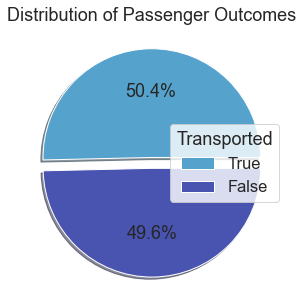

In [235]:
# # # Visualize transportation distribution

plt.figure(figsize =(9, 5))
plt.pie(train_df.Transported.value_counts(), shadow=True, explode=(.05, .05),  autopct='%.1f%%')
plt.title('Distribution of Passenger Outcomes')
plt.legend(['True', 'False'], loc='center right', title='Transported')
plt.show()

Across all passengers in the train data set, there is a ~50/50 chance of getting transported out or not. Other features need to be investigated to see what can be an indicator of transported or not.

## VIP Status
Nearly all passengers in the train data set are not a VIP member. Along with this, there seems to be almost no difference in the rate of being transported across true and false for VIP. VIP status, in turn, does not seem to be a significant factor in transportation status and will most likely be dropped.

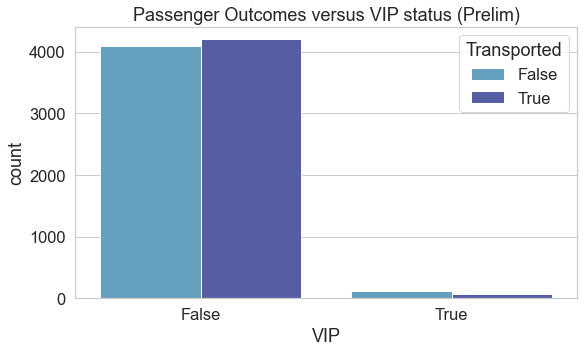

In [236]:
# # # Visualize VIP distribution across passengers

plt.figure(figsize =(9, 5))
sns.countplot(train_df.VIP, hue=train_df.Transported)
plt.title('Passenger Outcomes versus VIP status (Prelim)')
plt.show()

## Amenities
When looking at the spending of the passengers across the various amenities on the ship, it can be seen that a majority (at least half) of the passengers did not spend anything. Both the median and mode of every amenity was 0, but a group of small spenders and large spending outliers dragged the mean to larger values.

In [237]:
# # # Look at how spending was done on the ship

print('Mean, median, and mode of money spent on each amenity across all passengers:\n')
print('_'*40, '\n')
print('Mean: \n{}'.format(train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mean().round(2)), '\n')
print('_'*40, '\n')
print('Median: \n{}'.format(train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].median().round(2)), '\n')
print('_'*40, '\n')
print('Mode: \n{}'.format(train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].mode().round(2)), '\n')
print('_'*40, '\n')

Mean, median, and mode of money spent on each amenity across all passengers:

________________________________________ 

Mean: 
RoomService     224.69
FoodCourt       458.08
ShoppingMall    173.73
Spa             311.14
VRDeck          304.85
dtype: float64 

________________________________________ 

Median: 
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64 

________________________________________ 

Mode: 
   RoomService  FoodCourt  ShoppingMall  Spa  VRDeck
0          0.0        0.0           0.0  0.0     0.0 

________________________________________ 



## Age
Most passengers seem to be around 18-25, with a disproportionatly small amount of youth compared to older passengers.

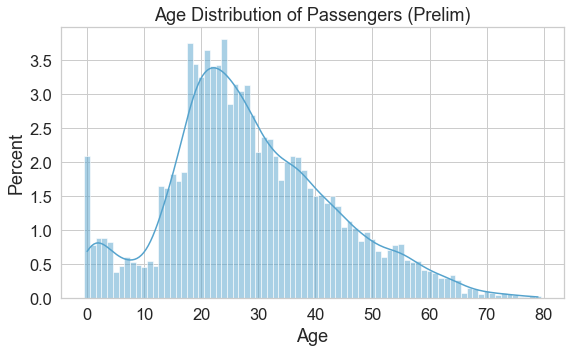

In [238]:
# # # Visualize the age distribution of the passengers

plt.figure(figsize =(9, 5))
sns.histplot(train_df.Age, kde=True, stat='percent', discrete=True)
plt.title('Age Distribution of Passengers (Prelim)')
plt.show()

## Cryosleep


Around 64% of passengers in the train data set were not in cryosleep during the trip. Among those passengers, ~3750 passengers did not survive while ~1750 were transported out. This results in a survival rate of about 32%. The passengers in cryosleep saw a much larger group be transported out. About 500 passengers died and ~2500 passengers were transported out safely. A survival rate of ~83% results in this case. Cryosleep seems to be a very important indicator of survival.

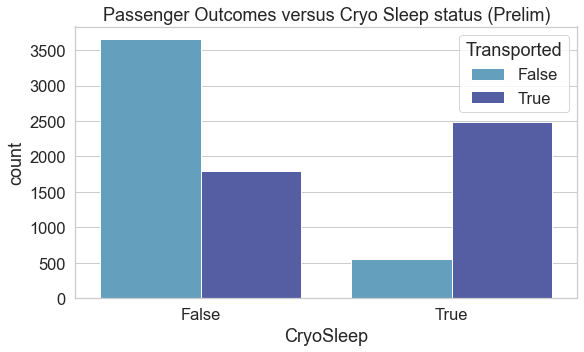

In [239]:
# # # Visualize how cryosleep status affects transportation

plt.figure(figsize =(9, 5))
sns.countplot(train_df.CryoSleep,hue=train_df.Transported)
plt.title('Passenger Outcomes versus Cryo Sleep status (Prelim)')
plt.show()

In [240]:
# # # Find ratio of Cryo Sleep statuses

x1 = train_df.loc[train_df['CryoSleep'] == True, 'CryoSleep'].count() / train_df['CryoSleep'].count()
x2 = train_df.loc[train_df['CryoSleep'] == False, 'CryoSleep'].count() / train_df['CryoSleep'].count()

print('Percentage of Cryo Sleep statuses:', '\nTrue: {:.4f}%'.format(x1*100), '\nFalse: {:.4f}%'.format(x2*100))

Percentage of Cryo Sleep statuses: 
True: 35.8306% 
False: 64.1694%


## Home Planet
A majority of the passengers are coming from Earth. Europa and Mars seem to have a rougly equal amount of passengers for each of the home planets. In terms of transportation rate, those coming from Europa seemed to have a higher chance of being transported while passengers from Earth had a lower chance.

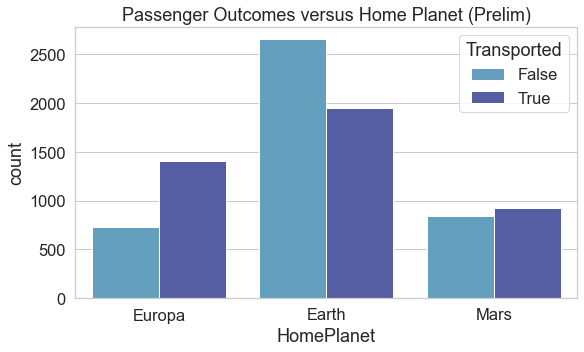

In [241]:
# # # Visualize passengers outcomes based on their home planet

plt.figure(figsize =(9, 5))
sns.countplot(train_df.HomePlanet,hue=train_df.Transported)
plt.title('Passenger Outcomes versus Home Planet (Prelim)')
plt.show()

In [242]:
# # # Find ratio of Home Planets

y1 = train_df.loc[train_df['HomePlanet'] == 'Earth', 'HomePlanet'].count() / train_df['HomePlanet'].count()
y2 = train_df.loc[train_df['HomePlanet'] == 'Europa', 'HomePlanet'].count() / train_df['HomePlanet'].count()
y3 = train_df.loc[train_df['HomePlanet'] == 'Mars', 'HomePlanet'].count() / train_df['HomePlanet'].count()

print('Percentage of Passengers from Home Planet:', '\nEarth: {:.4f}%'.format(y1*100), '\nEuropa: {:.4f}%'.format(y2*100), '\nMars: {:.4f}%'.format(y3*100))

Percentage of Passengers from Home Planet: 
Earth: 54.1922% 
Europa: 25.0942% 
Mars: 20.7136%


## Destination
A large majority of passengers are heading to TRAPPIST-1e. Those heading there had a slightly higher chance of not being teleported, but for all destinations it seems like transportation status is minimally effected.

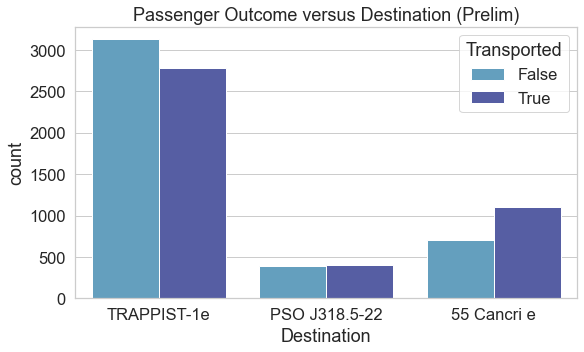

In [243]:
# # # Visualize passengers outcomes based on their destination

plt.figure(figsize =(9, 5))
sns.countplot(train_df.Destination,hue=train_df.Transported)
plt.title('Passenger Outcome versus Destination (Prelim)')
plt.show()

In [244]:
# # # Find ratio of Destinations

z1 = train_df.loc[train_df['Destination'] == 'TRAPPIST-1e', 'Destination'].count() / train_df['Destination'].count()
z2 = train_df.loc[train_df['Destination'] == '55 Cancri e', 'Destination'].count() / train_df['Destination'].count()
z3 = train_df.loc[train_df['Destination'] == 'PSO J318.5-22', 'Destination'].count() / train_df['Destination'].count()

print('Percentage of Passengers going to Destination:', '\nTRAPPIST-1e: {:.4f}%'.format(z1*100), '\n55 Cancri e: {:.4f}%'.format(z2*100), '\nPSO J318.5-22: {:.4f}%'.format(z3*100))

Percentage of Passengers going to Destination: 
TRAPPIST-1e: 69.4983% 
55 Cancri e: 21.1491% 
PSO J318.5-22: 9.3526%


# NaN Distribution

In [245]:
# # # Set up variables with number of rows and columns in each DF

r1,c1 = train_df.shape
r1,c2 = test_df.shape

# # # Find and print the number of NaN's in each DF

print('Number of NaN values per column: \n')
print('_'*40, '\n')
print('Train DF \n\n{}'.format(train_df.isna().sum().nlargest(c1)), '\n')
print('_'*40, '\n')
print('Test DF \n\n{}'.format(test_df.isna().sum().nlargest(c2)), '\n')
print('_'*40, '\n')

Number of NaN values per column: 

________________________________________ 

Train DF 

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64 

________________________________________ 

Test DF 

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64 

________________________________________ 



## VIP Status
As mentioned before, most passengers did not have VIP status. The mode of False will be used to fill in missing values.

In [246]:
# # # Fill in empty values for VIP with mode (False)

train_df['VIP'] = train_df['VIP'].fillna(False)
test_df['VIP'] = test_df['VIP'].fillna(False)

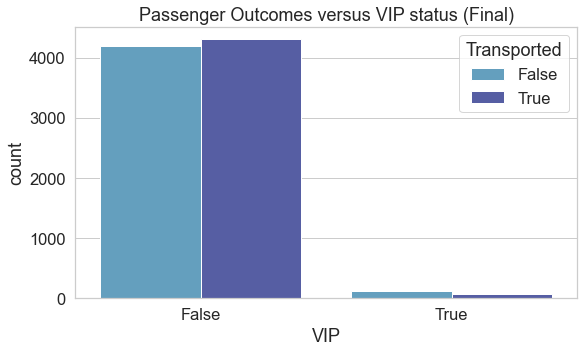

In [247]:
# # # Visualize VIP distribution across passengers

plt.figure(figsize =(9, 5))
sns.countplot(train_df.VIP, hue=train_df.Transported)
plt.title('Passenger Outcomes versus VIP status (Final)')
plt.show()

## Amenities
With both the median and the mode for spending at each amenity being 0 dollars, it was decided that the missing values would be filled in with 0 dollars.

In [248]:
# # # Fill in missing values for spending with mode ($0)

train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [249]:
# # # Calculate the total amount spent based on spending at each amenity

train_df['TotalSpent'] = train_df['RoomService'] + train_df['FoodCourt'] + train_df['ShoppingMall'] + train_df['Spa'] + train_df['VRDeck']
test_df['TotalSpent'] = test_df['RoomService'] + test_df['FoodCourt'] + test_df['ShoppingMall'] + test_df['Spa'] + test_df['VRDeck']

# # # Create feature indicating whether or not someone has spent money on amenities

train_df['NoneSpent'] = (train_df['TotalSpent'] == 0).astype(bool)
test_df['NoneSpent'] = (test_df['TotalSpent'] == 0).astype(bool)

train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalSpent,NoneSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,False
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,774.0,False
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1584.0,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Candra Jacostaffey,True,0.0,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1018.0,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0.0,True


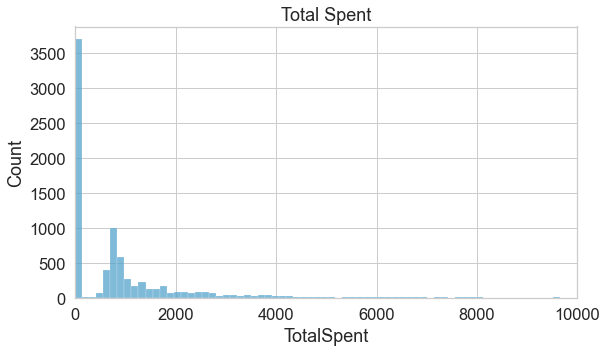

In [250]:
plt.figure(figsize = (9,5))
sns.histplot(train_df['TotalSpent'])
plt.xlim([0,10000])
plt.title('Total Spent')
plt.show()

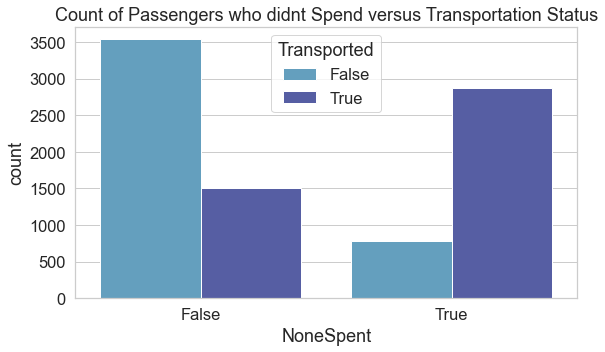

In [251]:
plt.figure(figsize = (9,5))
sns.countplot(train_df['NoneSpent'], hue = train_df['Transported'])
plt.title('Count of Passengers who didnt Spend versus Transportation Status')
plt.show()

Spending seems to be an important indicator in transportation. It is important to remember that being in cryosleep has already shown to be an important indicator and a passenger in cryosleep did not have the ability to spend money on amenities, so some of the large survival rate can be attributed to cryosleep.

## Age
To most accurately represent the ages missing from the data set, a random integer ranging from one standard deviation below to one standard deviation above the mean age was assigned to each missing value.

In [252]:
# # # Fill in empty values for Age with values between 1 standard deviation away from the mean
np.random.seed(0)
train_df['Age'] = train_df['Age'].fillna(np.random.randint(train_df.Age.mean() - train_df.Age.std(), train_df.Age.mean() + train_df.Age.std()))
np.random.seed(0)
test_df['Age'] = test_df['Age'].fillna(np.random.randint(train_df.Age.mean() - train_df.Age.std(), train_df.Age.mean() + train_df.Age.std()))

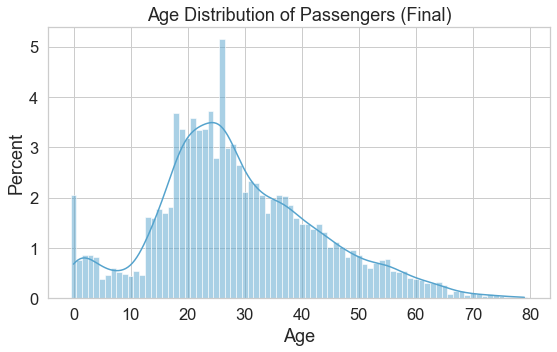

In [253]:
# # # Visualize the age distribution of the passengers

plt.figure(figsize = (9, 5))
sns.histplot(train_df.Age, kde=True, stat='percent', discrete=True)
plt.title('Age Distribution of Passengers (Final)')
plt.show()

## Cryosleep
When filling in the missing values for cryosleep, the most confident values were imputed first. If a passenger was in cryosleep, it is safe to assume that they would not have spent any money at the amenities. This can be seen in the data, as shown below. Passengers who are missing values for cryosleep and did not spend any money were filled with a value of True as they most likely were actually in cryosleep. Passengers who did spend money on the ship were filled with a cryosleep value of False to match the mode.

In [254]:
# # # View relationship between spending and cryo sleep

print(train_df.groupby(['NoneSpent','CryoSleep'])['CryoSleep'].size().unstack().fillna(0), '\n', '\n{}'.format(test_df.groupby(['NoneSpent','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)))

CryoSleep   False    True
NoneSpent                
False      4921.0     0.0
True        518.0  3037.0 
 
CryoSleep   False    True
NoneSpent                
False      2418.0     0.0
True        222.0  1544.0


In [255]:
train_df.loc[(train_df['NoneSpent'] == 1), "CryoSleep"].fillna(True)
test_df.loc[(test_df['NoneSpent'] == 1), "CryoSleep"].fillna(True)

train_df.loc[(train_df['NoneSpent'] == 0), "CryoSleep"].fillna(False)
test_df.loc[(test_df['NoneSpent'] == 0), "CryoSleep"].fillna(False)

print('Number of missing values:', train_df.CryoSleep.isna().sum())

Number of missing values: 217


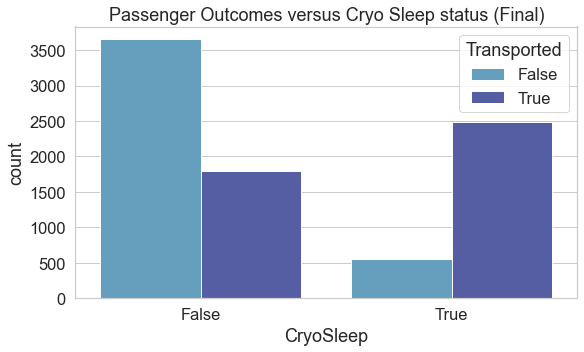

In [256]:
# # # Visualize how cryosleep status affects transportation

plt.figure(figsize =(9, 5))
sns.countplot(train_df.CryoSleep,hue=train_df.Transported)
plt.title('Passenger Outcomes versus Cryo Sleep status (Final)')
plt.show()

## Home Planet
Missing values for Home Planet were filled in with the mode, Earth.

In [257]:
# # # Fill in empty values for Home Planet with mode

train_df['HomePlanet'].fillna("Earth")
test_df['HomePlanet'].fillna("Earth")

print('Number of missing values:', train_df.HomePlanet.isna().sum())

Number of missing values: 201


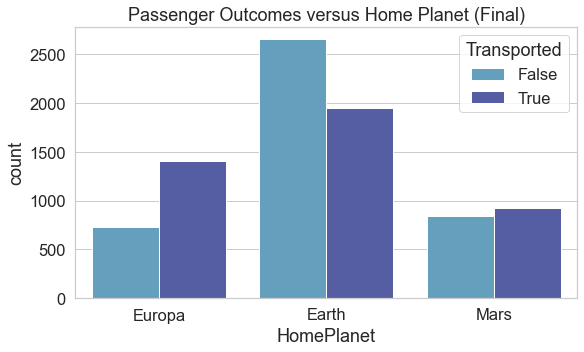

In [258]:
# # # Visualize passengers outcomes based on their home planet

plt.figure(figsize =(9, 5))
sns.countplot(train_df.HomePlanet,hue=train_df.Transported)
plt.title('Passenger Outcomes versus Home Planet (Final)')
plt.show()

## Destination
Missing values for Destination were filled in with the mode, TRAPPIST-1e.

In [259]:
# # # Fill in empty values for Destination with same distribution found in data

train_df['Destination'].fillna("TRAPPIST-1e")
test_df['Destination'].fillna("TRAPPIST-1e")

print('Number of missing values:', train_df.Destination.isna().sum())

Number of missing values: 182


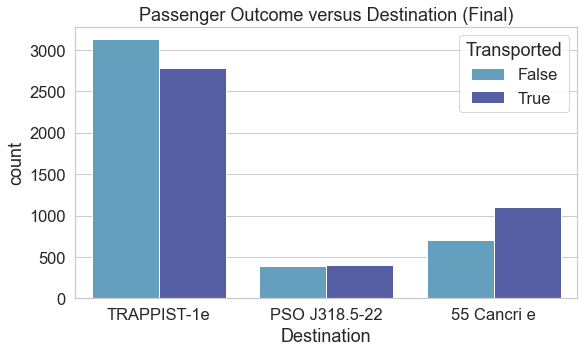

In [260]:
# # # Visualize passengers outcomes based on their destination

plt.figure(figsize =(9, 5))
sns.countplot(train_df.Destination,hue=train_df.Transported)
plt.title('Passenger Outcome versus Destination (Final)')
plt.show()

## Cabin


In [261]:
# # # Fill in missing data for Cabin

train_df['Cabin'] = train_df['Cabin'].fillna('T/0/P')
test_df['Cabin'] = test_df['Cabin'].fillna('T/0/P')

print('Number of missing values:', train_df.Cabin.isna().sum())

Number of missing values: 0


In [262]:
# # # Break Cabin column into deck, room number, and side of ship

train_df[['Deck','Num','Side']] = train_df.Cabin.str.split('/',expand=True)
test_df[['Deck','Num','Side']] = test_df.Cabin.str.split('/',expand=True)

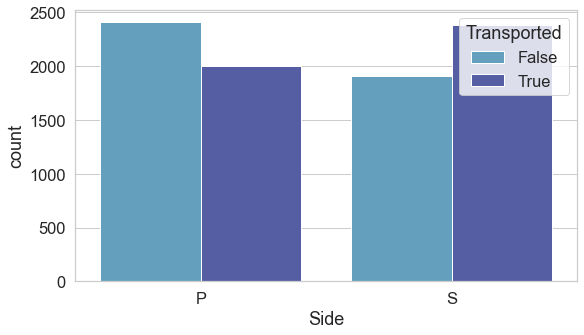

In [263]:
# # # Visualize passenger outcomes based on the side of the ship their room was on

plt.figure(figsize=(9,5))
sns.countplot(train_df['Side'], hue=train_df.Transported)
plt.show()

# Feature Engineering

## Group
Groups of passengers are able to be determined using the first section of their passenger id. From that, group size can be determined as well.

In [264]:
# # # Get group number from passanger ID

train_df['Group'] = train_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test_df['Group'] = test_df['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# # # Find size of each group

train_df['GroupSize']=train_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])
test_df['GroupSize']=test_df['Group'].map(lambda x: pd.concat([train_df['Group'], test_df['Group']]).value_counts()[x])

In [265]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,TotalSpent,NoneSpent,Deck,Num,Side,Group,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,0.0,True,B,0,P,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,736.0,False,F,0,S,2,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,10383.0,False,A,0,S,3,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,5176.0,False,A,0,S,3,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,1091.0,False,F,1,S,4,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,0.0,Sandie Hinetthews,True,774.0,False,F,0,P,5,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,0.0,Billex Jacostaffey,True,1584.0,False,F,2,S,6,2
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,0.0,Candra Jacostaffey,True,0.0,True,G,0,S,6,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,0.0,Andona Beston,True,1018.0,False,F,3,S,7,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,0.0,Erraiam Flatic,True,0.0,True,B,1,P,8,3


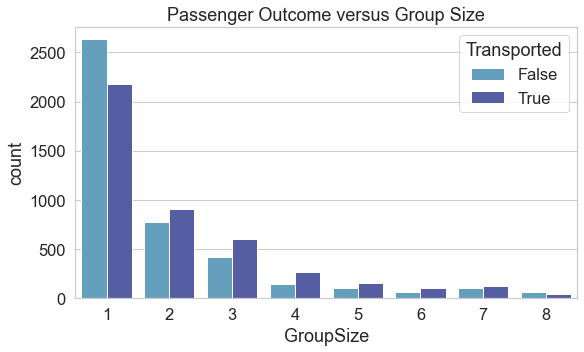

In [266]:
# # # Visualize group sizes and their outcomes

plt.figure(figsize = (9, 5))
sns.countplot(train_df.GroupSize,hue=train_df.Transported)
plt.title('Passenger Outcome versus Group Size')
plt.show()

Survival rate is >50% for all group sizes except 1 and 8. Judging by the amount of passengers represented in each group size, only a group size of 1 seems to have an indication of not being transported.

## Solo
Passengers in a group with a group size of 1 are indicated as Solo.

In [267]:
# # # Create feature indicating if a passenger is by themselves or not

train_df['Solo'] = (train_df['GroupSize'] == 1).astype(bool)
test_df['Solo'] = (test_df['GroupSize'] == 1).astype(bool)

train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,TotalSpent,NoneSpent,Deck,Num,Side,Group,GroupSize,Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0.0,True,B,0,P,1,1,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,736.0,False,F,0,S,2,1,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,10383.0,False,A,0,S,3,2,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,5176.0,False,A,0,S,3,2,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,1091.0,False,F,1,S,4,1,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,Sandie Hinetthews,True,774.0,False,F,0,P,5,1,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,Billex Jacostaffey,True,1584.0,False,F,2,S,6,2,False
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,Candra Jacostaffey,True,0.0,True,G,0,S,6,2,False
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,Andona Beston,True,1018.0,False,F,3,S,7,1,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,Erraiam Flatic,True,0.0,True,B,1,P,8,3,False


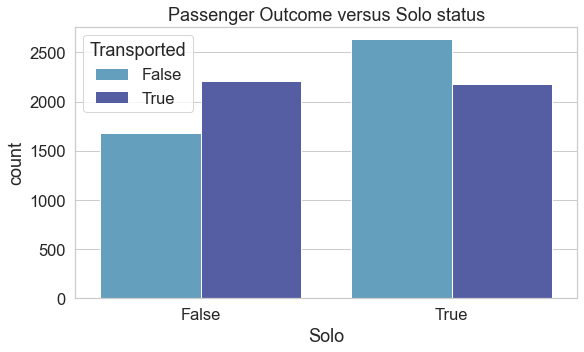

In [268]:
# # # Visualize group sizes and their outcomes

plt.figure(figsize = (9, 5))
sns.countplot(train_df.Solo,hue=train_df.Transported)
plt.title('Passenger Outcome versus Solo status')
plt.show()

## Age Group
Passengers were divided into pentiles based on age to assign age groups.

In [269]:
# # # Create new age group feature

train_df['AgeGroup'] = pd.qcut(train_df['Age'], 5, duplicates='drop')
test_df['AgeGroup'] = pd.qcut(test_df['Age'], 5, duplicates='drop')

train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,TotalSpent,NoneSpent,Deck,Num,Side,Group,GroupSize,Solo,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0.0,True,B,0,P,1,1,True,"(30.0, 40.0]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,736.0,False,F,0,S,2,1,True,"(18.0, 24.0]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,10383.0,False,A,0,S,3,2,False,"(40.0, 79.0]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,5176.0,False,A,0,S,3,2,False,"(30.0, 40.0]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,1091.0,False,F,1,S,4,1,True,"(-0.001, 18.0]"
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,True,774.0,False,F,0,P,5,1,True,"(40.0, 79.0]"
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,True,1584.0,False,F,2,S,6,2,False,"(24.0, 30.0]"
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,True,0.0,True,G,0,S,6,2,False,"(24.0, 30.0]"
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,True,1018.0,False,F,3,S,7,1,True,"(30.0, 40.0]"
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,True,0.0,True,B,1,P,8,3,False,"(-0.001, 18.0]"


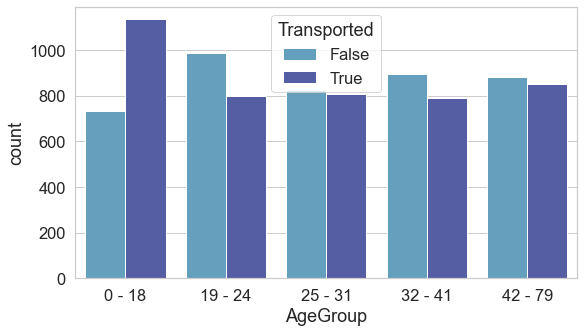

In [270]:
# # # Visualize how age group affects transportation

plt.figure(figsize =(9, 5))
sns.countplot(train_df['AgeGroup'], hue=train_df['Transported'])
plt.xticks([0,1,2,3,4], ['0 - 18', '19 - 24', '25 - 31', '32 - 41', '42 - 79'])
plt.show()

Survival rate is for the most part 50% except for minors, which appear to be transported out at a much larger rate. Being a minor seems to be important when predicting survival.

## Minor
Passengers under 18 are indicated as minors.

In [271]:
# # # Create feature indicating whether a passenger is a minor or not

train_df['Minor'] = (train_df['Age'] < 18).astype(bool)
test_df['Minor'] = (test_df['Age'] < 18).astype(bool)

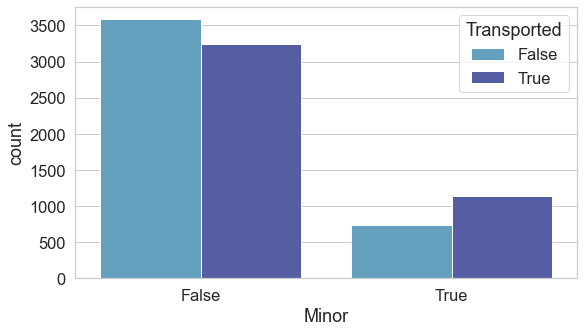

In [272]:
# # # Visualize how minor status affects transportation

plt.figure(figsize =(9, 5))
sns.countplot(train_df['Minor'], hue=train_df['Transported'])
plt.show()

# Preprocessing

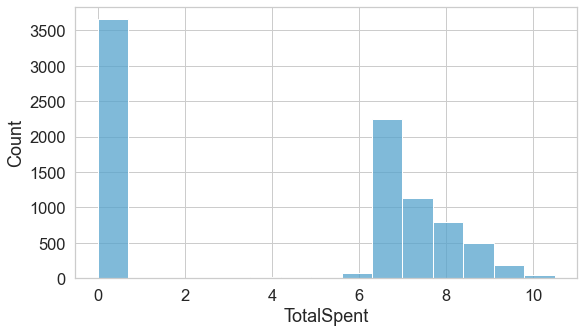

In [273]:
# # # Log transform the numerical columns to reduce the skewing from the outliers

log_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent']

for i in log_col:
    train_df[i] = np.log(1 + train_df[i])
    test_df[i] = np.log(1 + test_df[i])
    
plt.figure(figsize=(9,5))
sns.histplot(train_df['TotalSpent'])
plt.show()

In order to minimize the effect of the outliers, the log of the numerical columns was taken.

In [274]:
# # # Set up submission df

sub_ids = test_df['PassengerId'].copy()

# # # Drop unneeded columns

train_df.drop(['PassengerId', 'VIP', 'Name', 'Cabin', 'Deck', 'Num', 'Group', 'GroupSize', 'Age', 'AgeGroup'], axis=1, inplace=True)
test_df.drop(['PassengerId', 'VIP', 'Name', 'Cabin', 'Deck', 'Num', 'Group', 'GroupSize', 'Age', 'AgeGroup'], axis=1, inplace=True)

train_df.head(10)

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpent,NoneSpent,Side,Solo,Minor
0,Europa,False,TRAPPIST-1e,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,True,P,True,False
1,Earth,False,TRAPPIST-1e,4.700480,2.302585,3.258097,6.309918,3.806662,True,6.602588,False,S,True,False
2,Europa,False,TRAPPIST-1e,3.784190,8.182280,0.000000,8.812248,3.912023,False,9.248021,False,S,False,False
3,Europa,False,TRAPPIST-1e,0.000000,7.157735,5.918894,8.110728,5.267858,False,8.551981,False,S,False,False
4,Earth,False,TRAPPIST-1e,5.717028,4.262680,5.023881,6.338594,1.098612,True,6.995766,False,S,True,True
5,Earth,False,PSO J318.5-22,0.000000,6.182085,0.000000,5.676754,0.000000,True,6.652863,False,P,True,False
6,Earth,False,TRAPPIST-1e,3.761200,7.339538,1.386294,0.000000,0.000000,True,7.368340,False,S,False,False
7,Earth,True,TRAPPIST-1e,0.000000,0.000000,0.000000,0.000000,0.000000,True,0.000000,True,S,False,False
8,Earth,False,TRAPPIST-1e,0.000000,6.666957,2.890372,5.379897,0.000000,True,6.926577,False,S,True,False
9,Europa,True,55 Cancri e,0.000000,0.000000,0.000000,0.000000,0.000000,True,0.000000,True,P,False,True


In [276]:
# # # Separate labels and features

X = train_df.drop('Transported', axis=1).copy()
y = train_df['Transported'].copy().astype(int)

In [275]:
# # # Look at dtypes of the columns

train_df.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
TotalSpent      float64
NoneSpent          bool
Side             object
Solo               bool
Minor              bool
dtype: object

In [277]:
# # # Get numerical and categorical columns from the data frame

numerical_cols = [c for c in X.columns if X[c].dtype in ['float64']]
categorical_cols = [c for c in X.columns if X[c].dtype in ['bool', 'object']]

print(numerical_cols, "\n{}".format(categorical_cols))

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpent'] 
['HomePlanet', 'CryoSleep', 'Destination', 'NoneSpent', 'Side', 'Solo', 'Minor']


In [278]:
print('Shape of train dataframe:', X.shape, '\nShape of test dataframe:', test_df.shape)

Shape of train dataframe: (8693, 13) 
Shape of test dataframe: (4277, 13)


In [279]:
# # # Transform and encode the data

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='if_binary', sparse=False)

ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('one_hot_encoder', categorical_transformer, categorical_cols)],
        remainder='passthrough')

X = pd.DataFrame(ct.fit_transform(X))
test_df = pd.DataFrame(ct.fit_transform(test_df))

In [280]:
print('Shape of train dataframe:', X.shape, '\nShape of test dataframe:', test_df.shape)

Shape of train dataframe: (8693, 21) 
Shape of test dataframe: (4277, 21)


# Train Model

In [281]:
# # # Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [282]:
# # # Set up model and use GridSearchCV across a parameter grid in order to find optimal parameters

classifier = CatBoostClassifier(verbose=False, random_state=0)

param_grid = {
    'n_estimators': [50, 100, 150],
    'loss_function': ['Logloss'],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.05, 0.1, 0.15]
}

grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017D061E8F40>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'loss_function': ['Logloss'], 'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [301]:
# # # Get score and best parameters from the grid search

best_params = grid.best_params_

print("Score: {}".format(round(grid.score(X_test, y_test), 4)))
print("Optimal Parameters: \n", best_params)

Score: 0.7884
Optimal Parameters: 
 {'learning_rate': 0.1, 'loss_function': 'Logloss', 'max_depth': 4, 'n_estimators': 150}


A wide range of values were used for each set of parameters in the GridSearch. In order to find the parameter values that most optimize the model, a new GridSearch will be done searching values close to the previously picked optimal value.

In [284]:
# # # Search for possible better parameters not included previously

param_grid_refined = {
    'n_estimators': [125, 150, 175],
    'loss_function': ['Logloss'],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.075, 0.1, 0.125]
}

grid_refined = GridSearchCV(estimator=classifier, param_grid=param_grid_refined, cv=5, scoring='accuracy', n_jobs=-1)
grid_refined.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000017D061E8F40>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.075, 0.1, 0.125],
                         'loss_function': ['Logloss'], 'max_depth': [2, 4, 6],
                         'n_estimators': [125, 150, 175]},
             scoring='accuracy')

In [302]:
# # # Get score and best parameters from the grid search

best_params_refined = grid_refined.best_params_

print("Score: {}".format(round(grid_refined.score(X_test, y_test), 4)))
print("Refined Optimal Parameters: \n", best_params_refined)

Score: 0.7884
Refined Optimal Parameters: 
 {'learning_rate': 0.1, 'loss_function': 'Logloss', 'max_depth': 6, 'n_estimators': 125}


Further investigating values found from the previous GridSearch provides new optimized values for max_depth (6) and n_estimators (125) that were not included in the original search. Learning rate still seems to be optimal at 0.1.

In [299]:
# # # Set up new model with the best parameters and fit to same data to view change in accuracy

best_classifier = CatBoostClassifier(**best_params_refined, verbose=False, random_state=0)

best_classifier.fit(X_test, y_test)

pred = best_classifier.predict(X_test) 
print("Score: {}".format(round(accuracy_score(y_test.values, pred), 4)))

Score: 0.8637


In [295]:
# # # Set up new model with the best parameters and fit to all training data

best_classifier = CatBoostClassifier(**best_params_refined, verbose=False, random_state=0)

best_classifier.fit(X, y)

pred = best_classifier.predict(X) 
print("Score: {}".format(round(accuracy_score(y.values, pred), 4)))

Score: 0.8216


In [288]:
# # # Print out feature importances

for i,z in zip(train_df.drop("Transported", axis=1).columns, best_classifier.get_feature_importance()):
    print('Importance of the', i,'feature is', round(z, 4))

Importance of the HomePlanet feature is 6.3512
Importance of the CryoSleep feature is 11.4661
Importance of the Destination feature is 7.0844
Importance of the RoomService feature is 13.1077
Importance of the FoodCourt feature is 10.8649
Importance of the ShoppingMall feature is 5.1181
Importance of the Spa feature is 8.1289
Importance of the VRDeck feature is 9.0564
Importance of the TotalSpent feature is 1.2879
Importance of the NoneSpent feature is 0.3254
Importance of the Side feature is 1.3175
Importance of the Solo feature is 4.979
Importance of the Minor feature is 0.0406


In [294]:
# # # Make and record predictions for submission

sub_pred = best_classifier.predict(test_df)

sub = pd.DataFrame({'PassengerId':sub_ids, 'Transported':sub_pred.astype(bool)})

sub.head(10)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,False
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,True


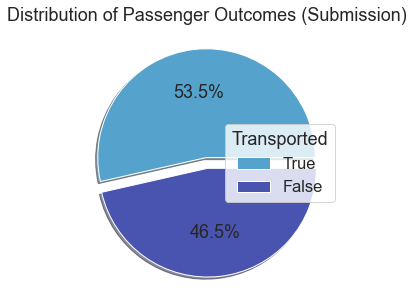

In [290]:
# # # Visualize transportation distribution

plt.figure(figsize = (9, 5))
plt.pie(sub.Transported.value_counts(), shadow=True, explode=(.05, .05),  autopct='%.1f%%')
plt.title('Distribution of Passenger Outcomes (Submission)')
plt.legend(['True', 'False'], loc='center right', title='Transported')
plt.show()

In [291]:
sub.to_csv('submission.csv', index=False)